### Imports

In [95]:
# coding: utf-8
import string
import re
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from nltk.stem import RSLPStemmer
from graphviz import Source
from collections import Counter
from IPython.display import display
from IPython.display import SVG
# nltk.download('stopwords')
# nltk.download('rslp')
# conda install graphviz

In [96]:
# %%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [97]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
# method to remove stopwords
def RemoveStopWords(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    listW = ""
    for wrd in sent.split(" "):
        if wrd not in stp:
            listW += str(wrd)+" "
    return listW

In [99]:
def stemming(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    stemmer = nltk.stem.RSLPStemmer()
    listW = []
    for (desc, value) in sent:
        aux = [str(stemmer.stem(p))
                       for p in desc.split() if p not in stp]
        listW.append((aux, value))
    return listW

In [100]:
def tokenize(sent):
    sent = sent.lower()
    sent = nltk.tokenize.word_tokenize(sent, language='portuguese')
    return sent

In [101]:
def stemmingSimple(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    stemmer = RSLPStemmer()
    listW = []
    for wrd in sent:
        for p in wrd.split():
            if p not in stp:
                wrd = stemmer.stem(wrd.lower())
                listW.append(wrd)
    return listW

In [102]:
def addAllWords(sent):
    words = []
    for (desc, value) in sent:
        words.extend(desc)
    return words

In [103]:
def freqWords(sent):
    wrds = nltk.FreqDist(sent)
    return wrds

In [104]:
def uniqueWords(sent):
    freq = sent.keys()
    return freq

In [105]:
def extractWords(sent):
    doc = set(sent)
    characteristics = {}
    for wdr in u_words_train:
        characteristics['%s' % wdr] = (wdr in doc)
    return characteristics

In [106]:
def models(X_train, Y_train, X_test, Y_test):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    log_pred = log.predict(X_test)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    knn_pred = knn.predict(X_test)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    svc_lin_pred = svc_lin.predict(X_test)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    svc_rbf_pred = svc_rbf.predict(X_test)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    gauss_pred = gauss.predict(X_test)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit (X_train, Y_train)
    tree_pred = tree.predict(X_test)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    forest_pred = forest.predict(X_test)
    
    from sklearn.linear_model import Perceptron
    pcp = Perceptron(random_state = 0)
    pcp.fit(x_train, y_train)
    pcp_pred = pcp.predict(x_test)
    
    from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
    mnb = MultinomialNB(alpha=.01)
    mnb.fit(x_train, y_train)
    mnb_pred = mnb.predict(x_test)
    
    bnb = BernoulliNB(alpha=.01)
    bnb.fit(x_train, y_train)
    bnb_pred = bnb.predict(x_test)
    
    cnb = ComplementNB(alpha=.1)
    cnb.fit(x_train, y_train)
    cnb_pred = cnb.predict(x_test)
    
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[0]Logistic Regression Training Accuracy: ', accuracy_score(Y_test, log_pred))
    print(classification_report(y_test, log_pred))
    
    print('[1]KNeighborns Training Accuracy: ', knn.score(X_train, Y_train))
    print('[1]KNeighborns Training Accuracy: ', accuracy_score(Y_test, knn_pred))
    print(classification_report(y_test, knn_pred))
    
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', accuracy_score(Y_test, svc_lin_pred))
    print(classification_report(y_test, svc_lin_pred))
    
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy: ', accuracy_score(Y_test, svc_rbf_pred))
    print(classification_report(y_test, svc_rbf_pred))
    
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', accuracy_score(Y_test, gauss_pred))
    print(classification_report(y_test, gauss_pred))
    
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', accuracy_score(Y_test, tree_pred))
    print(classification_report(y_test, tree_pred))
    
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', accuracy_score(Y_test, forest_pred))
    print(classification_report(y_test, forest_pred))
    
    print('[7] Perceptron Training Accuracy: ', pcp.score(X_train, Y_train))
    print("[7] Perceptron Testing accuracy: ", accuracy_score(y_test, pcp_pred))
    print(classification_report(y_test, pcp_pred))
    
    print('[8] MultinomialNB Training Accuracy: ', mnb.score(X_train, Y_train))
    print("[8] MultinomialNB Testing accuracy: ", accuracy_score(Y_test, mnb_pred))
    print(classification_report(y_test, pcp_pred))
    
    print('[9] BernoulliNB Training Accuracy: ', bnb.score(X_train, Y_train))
    print("[9] BernoulliNB Testing accuracy: ", accuracy_score(Y_test, bnb_pred))
    print(classification_report(y_test, pcp_pred))

    print('[10] ComplementNB Training Accuracy: ', cnb.score(X_train, Y_train))
    print("[10] ComplementNB Testing accuracy: ", accuracy_score(Y_test, cnb_pred))
    print(classification_report(y_test, pcp_pred))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, pcp, mnb, bnb, cnb

In [107]:
def makeAcuracy(tree,x_test,y_test):
    predictions = clf.predict(x_test)
    erro = 0.0
    for x in range(len(predictions)):
        if predictions[x] != y_test[x]:
            erro += 1.
    acuracy = (1-(erro/len(predictions)))
    return acuracy

In [108]:
# ocomon_train_2.0 had your values analyseds individualy and it was seted the class manually
df_train = pd.read_csv('CSV/ocomon_train_2.0.csv', usecols=['DESCRIB', 'HAS_VALUE'])
df_test = pd.read_csv('CSV/ocomon_test_2.0.csv', usecols=['DESCRIB', 'HAS_VALUE'])

In [109]:
df_train.sample(3)

,DESCRIB,HAS_VALUE
747,conferidofoi efetuada uma solicitacao de supor...,NP
1516,impressora nao funciona obs divisao de desenvo...,NP
1370,no break nao esta ligando solucao para este ...,P


In [110]:
df_train.loc[1]

DESCRIB      computador nao liga  sujeira e mau na memoria ...
HAS_VALUE                                                    P
Name: 1, dtype: object

In [111]:
df_test.sample(3)

,DESCRIB,HAS_VALUE
5691,ccmde cceetelvina para o tecnico entrar em hd...,NaN
14824,nao liga null nobreaks,NaN
10785,troca de cordoes de fibra solucao para este pr...,NaN


In [112]:
df_train.describe()

,DESCRIB,HAS_VALUE
count,2999,1601
unique,2903,2
top,placa mae defeito solucao para este problema...,NP
freq,18,1247


In [113]:
df_test.describe()

,DESCRIB,HAS_VALUE
count,15802,10795
unique,14547,2
top,placa mae queimada solucao para este problema ...,NP
freq,103,8855


In [114]:
# here was declareted a array to store all descriptions from dataframe in column "DESCRIB"
describ_train = []
describ_test = []
# store a class from description
classifier_train = []
classifier_test = []

In [115]:
for line in df_train['DESCRIB']:
    regex = r"(null|(a)a+|(e)e+|(i)i+|(o)o+|(u)u+|(b)b+|(c)c+|(d)d+|(e)e+|(f)f+|(g)g+|(h)h+|(j)j+|(k)k+|(l)l+|(m)m+|(n)n+|(p)p+|(q)q+|(r)rr+|(s)ss+|(t)t+|(u)u+|(v)v+|(x)x+|(z)z+)"
    subst = "\\2\\3\\4\\5\\6\\7\\8\\9\\10\\11\\12\\13\\14\\15\\16\\17\\18\\19\\20\\21\\22\\23\\24\\25\\26\\27"
    result = re.sub(regex, subst, line.lower(), 0, re.MULTILINE | re.IGNORECASE)
    result = RemoveStopWords(result)
    describ_train.append(result)
    
for line in df_test['DESCRIB']:
    regex = r"(null|(a)a+|(e)e+|(i)i+|(o)o+|(u)u+|(b)b+|(c)c+|(d)d+|(e)e+|(f)f+|(g)g+|(h)h+|(j)j+|(k)k+|(l)l+|(m)m+|(n)n+|(p)p+|(q)q+|(r)rr+|(s)ss+|(t)t+|(u)u+|(v)v+|(x)x+|(z)z+)"
    subst = "\\2\\3\\4\\5\\6\\7\\8\\9\\10\\11\\12\\13\\14\\15\\16\\17\\18\\19\\20\\21\\22\\23\\24\\25\\26\\27"
    result = re.sub(regex, subst, line.lower(), 0, re.MULTILINE | re.IGNORECASE)
    result = RemoveStopWords(result)
    describ_test.append(result)

In [116]:
describ_train[1]

'computador nao liga  sujeira mau memoria ram   '

In [117]:
for line in df_train['HAS_VALUE']:
    classifier_train.append(line)
for line in df_test['HAS_VALUE']:
    classifier_test.append(line)

In [118]:
train = []
i = 0
for line in describ_train:
    aux = []
    aux.append(line)
    aux.append(classifier_train[i])
    train.append(aux)
    i += 1
    
test = []
i = 0
for line in describ_test:
    aux = []
    aux.append(line)
    aux.append(classifier_test[i])
    test.append(aux)
    i += 1

In [119]:
train[1]

['computador nao liga  sujeira mau memoria ram   ', 'P']

In [23]:
# applie stemming in each list
train = stemming(train)
test = stemming(test)

In [94]:
train[1]

(['comput', 'nao', 'lig', 'suj', 'mau', 'memor', 'ram'], 'P')

In [26]:
# create a list of all word finded to train set
words_train = addAllWords(train)
#words_train

In [27]:
# create a list of all word finded to test set
words_test = addAllWords(test)

In [50]:
# list frequency of all words in the list of describ
f_words_train = freqWords(words_train)
f_words_train

FreqDist({'email': 2295, 'problem': 2175, 'solicitaca': 2071, 'nao': 1357, 'comput': 1284, 'soluca': 1216, 'instal': 1055, 'cri': 848, 'instalaca': 799, 'red': 785, ...})

In [54]:
f_words_train2 = sorted(f_words_train.items(), key=lambda x: x[1],  reverse=True)

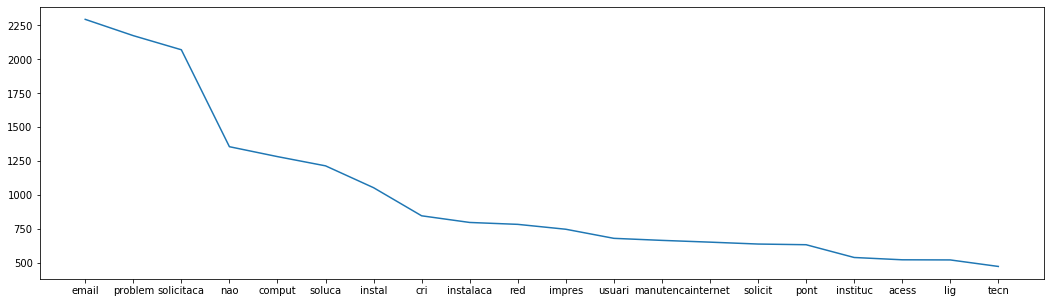

In [81]:
ky = []
vl = []
for key, value in f_words_train2:
    ky.append(key)
    vl.append(value)
    
plt.figure(figsize=(18,5))
plt.plot(ky[0:20], vl[0:20])
plt.show()

In [64]:
# list frequency of all words in the list of describ
f_words_test= freqWords(words_test)

In [65]:
# dictionary of words distinct in the list of train set
u_words_train = uniqueWords(f_words_train)

# dictionary of words distinct in the list of test set
u_words_test = uniqueWords(f_words_test)

### FUNTIONALITY VERIFICATION

In [66]:
# verify weither a word is inside of list of words in describ columns from dataframe ocomon
phrse = 'ola esse e um teste se esta funcionando'
phrse = tokenize(phrse)
phrse = stemmingSimple(phrse)
#phrse = stemming(phrse)
phrse

['ola', 'test', 'funcion']

In [67]:
x, y = train_test_split(train, test_size = 0.3, random_state = 100)

baseTrue = nltk.classify.apply_features(extractWords,train)

baseOfTrain = nltk.classify.apply_features(extractWords,x)
baseOfTest = nltk.classify.apply_features(extractWords,y)

complet = nltk.classify.apply_features(extractWords,test)

In [82]:
baseTrue[545][0]

{'solicit': False,
 'manutenca': False,
 'pont': False,
 'reded': False,
 'solicitaca': True,
 'mprnom': False,
 'jaclason': False,
 'mach': False,
 'verascpf': False,
 'email': False,
 'agricol': False,
 'teresinaidentificaca': False,
 's': False,
 'laboratori': False,
 'informa': False,
 'labidentificaca': False,
 'rdescrica': False,
 'problem': True,
 'faz': False,
 'substituica': False,
 'defeit': False,
 'cuj': False,
 'mesm': False,
 'nao': True,
 'permit': False,
 'acess': False,
 'internet': False,
 'soluca': False,
 'comput': False,
 'lig': False,
 'suj': False,
 'mau': False,
 'memor': False,
 'ram': False,
 'moni': False,
 'tb': False,
 'imag': False,
 'aparec': False,
 'ja': False,
 'tir': False,
 'recoloq': False,
 'cab': False,
 'nad': False,
 'acontec': False,
 'fac': False,
 'nan': False,
 'substitu': False,
 'inicializ': False,
 'desabilit': False,
 'envi': False,
 'serv': False,
 'funcion': False,
 'cadastr': False,
 'cham': False,
 'mens': False,
 'err': False,
 'pes

### TRUE

In [72]:
x_true = [] #FEATURES
y_true = [] #LABELS
for element in baseTrue:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_true.append(aux)
    y_true.append(element[1])

### TRAIN

In [73]:
x_train = [] #FEATURES
y_train = [] #LABELS
for element in baseOfTrain:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_train.append(aux)
    y_train.append(element[1])

### TEST

In [74]:
x_test = [] #FEATURES
y_test = [] #LABELS
for element in baseOfTest:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_test.append(aux)
    y_test.append(element[1])

### COMPLET

In [75]:
cpl = [] #FEATURES
for element in complet:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    cpl.append(aux)

# CLASSIFICATIONS

In [76]:
#graph = Source(tree.export_graphviz(clf, out_file=None, filled = True, class_names=['P', 'NP', 'nan']))
#display(SVG(graph.pipe(format='svg')))

In [77]:
mod = models(x_train,y_train, x_test, y_test)

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0]Logistic Regression Training Accuracy:  0.9799904716531682
[0]Logistic Regression Training Accuracy:  0.9044444444444445
              precision    recall  f1-score   support

          NP       0.90      0.89      0.90       376
           P       0.92      0.78      0.85       102
         nan       0.91      0.94      0.92       422

    accuracy                           0.90       900
   macro avg       0.91      0.87      0.89       900
weighted avg       0.90      0.90      0.90       900

[1]KNeighborns Training Accuracy:  0.9028108623153883
[1]KNeighborns Training Accuracy:  0.8511111111111112
              precision    recall  f1-score   support

          NP       0.80      0.91      0.85       376
           P       0.90      0.62      0.73       102
         nan       0.90      0.85      0.87       422

    accuracy                           0.85       900
   macro avg       0.87      0.79      0.82       900
weighted avg       0.86      0.85      0.85       900

[2]SVC

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[4]Gaussian NB Training Accuracy:  0.8732729871367317
[4]Gaussian NB Training Accuracy:  0.7155555555555555
              precision    recall  f1-score   support

          NP       0.71      0.67      0.69       376
           P       0.42      0.75      0.54       102
         nan       0.87      0.75      0.81       422

    accuracy                           0.72       900
   macro avg       0.67      0.72      0.68       900
weighted avg       0.75      0.72      0.73       900

[5]Decision Tree Training Accuracy:  0.9990471653168176
[5]Decision Tree Training Accuracy:  0.8777777777777778
              precision    recall  f1-score   support

          NP       0.89      0.85      0.87       376
           P       0.81      0.77      0.79       102
         nan       0.89      0.93      0.91       422

    accuracy                           0.88       900
   macro avg       0.86      0.85      0.85       900
weighted avg       0.88      0.88      0.88       900

[6]Random Forest T

In [78]:
#makeAcuracy(clf,x_train,y_train)

In [79]:
y_pred_cpl = mod[0].predict(cpl)

In [80]:
#confusion_matrix(y_pred_true, y_true)

In [81]:
df = pd.DataFrame({'HAS_VALUE': y_pred_cpl})
df.to_csv('prediction_ocomon_log.csv', index=False)

In [82]:
df.sample(5)

,HAS_VALUE
14923,NP
3758,nan
13651,P
15489,P
5896,NP


In [83]:
new_df = pd.read_csv('CSV/ocomon_test_2.0.csv')
new_df.tail(2)

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,s.o,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15801,computador nao liga aberto por felipe a null ...,NaN,hardware,hardware,computador,teresina,lucas lopes,bolsista geral 2018,161603,NP,...,8,54,18/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central


In [84]:
new_df['HAS_VALUE'] = df.HAS_VALUE.tolist()
new_df.tail(2)

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,s.o,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15801,computador nao liga aberto por felipe a null ...,NaN,hardware,hardware,computador,teresina,lucas lopes,bolsista geral 2018,161603,NP,...,8,54,18/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central


In [85]:
new_df.to_csv('ocomon_log.csv', index=False)

In [86]:
new_df

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
0,foi solicitado a manutencao de pontos de reded...,NaN,N.A,N.A,ponto de rede,teresina,jaclason machado veras,julia sousa santos,-999999,nan,...,9,15,18/4/2012,1,2,4,9,0,26/4/2012,sti_cca
1,computador nao liga sujeira e mau na memoria ...,NaN,hardware,ram,computador,teresina,secretaria do mestrado de piliticas publicas,luis carlos dos santos farias,140981,P,...,8,13,23/4/2014,2,2,4,9,4,23/4/2014,sti_cchl
2,meu computador esta ligando o monitor tb mas a...,NaN,hardware,hardware,computador,teresina,gabinete do reitor 5511,constanca dolores lopes monteiro,-999999,P,...,15,43,24/10/2011,1,4,4,15,59,24/10/2011,sti_central
3,desabilite o envio de email como o servico de ...,utilize esta descricao de problema para proble...,N.A,N.A,e-mail,teresina,guilherme,guilherme avelino,-999999,nan,...,13,20,24/10/2011,1,4,4,17,6,26/10/2011,sti_central
4,instalacao de impressoras e remocao de virus ...,NaN,hardware,virus,impressora,teresina,NaN,bolsista nti,-999999,NP,...,12,13,24/10/2011,1,4,4,9,11,26/10/2011,sti_central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15797,computador lentidao preuni cp foi realizado ba...,NaN,software,s.o,computador,teresina,erica cecilia,bolsista geral 2018,188134,NP,...,15,23,13/9/2019,4,3,3,8,21,17/9/2019,0
15798,computador lento e nao liga formatar apenas se...,NaN,hardware,outros,computador,teresina,igor cunha,bolsista geral 2018,175491,NP,...,16,21,13/9/2019,4,3,2,17,47,13/9/2019,0
15799,liga e desliga reinicia sozinho local prospeqi...,NaN,software,s.o,computador,teresina,joao xavier,bolsista geral 2018,237490,NP,...,16,31,16/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,s.o,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
